##Simple Linear Regression

In [4]:
x=[[500],[700],[900]] # sqrt land
y=[30,50,70]          # price

In [5]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [6]:
lr.fit(x,y) # training the model

LinearRegression()

In [7]:
lr.predict([[1500],[1200],[2000]]) # predict the value

array([130., 100., 180.])

In [8]:
x=[[500,2],[700,4],[900,4]] # sqrt land , no. of floors
y=[30,50,70]                # price

In [9]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [10]:
model.fit(x,y)

LinearRegression()

In [11]:
model.predict([[1500,2],[1200,4],[2000,3]])

array([130., 100., 180.])

In [12]:
import numpy as np
import pandas as pd

In [13]:
ds=pd.read_csv('/content/Salary_Data.csv')
ds.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [14]:
ds.shape

(30, 2)

In [15]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [16]:
ds.isnull().any()

YearsExperience    False
Salary             False
dtype: bool

In [17]:
ds.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [18]:
ds.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


<Axes: >

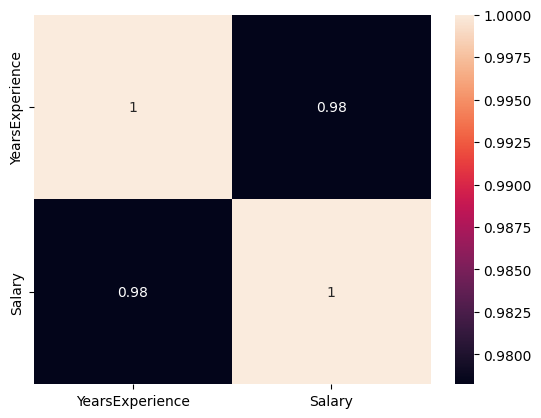

In [19]:
import seaborn as sns
sns.heatmap(ds.corr(),annot=True)

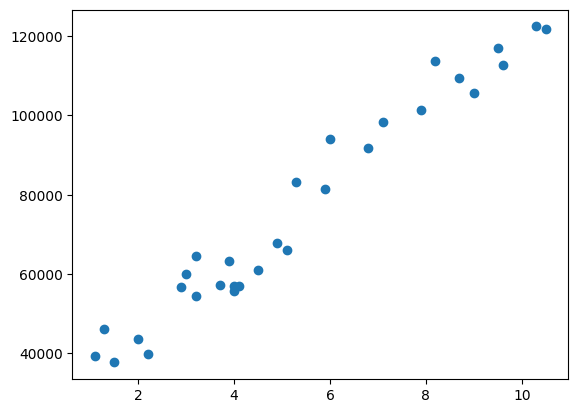

In [20]:
import matplotlib.pyplot as plt
plt.scatter(ds.YearsExperience,ds.Salary)

In [21]:
ds.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [22]:
# x and y split
x=ds.drop(columns=['Salary'],axis=1)
x.head()

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2


In [23]:
y=ds.Salary
y.head()

0    39343.0
1    46205.0
2    37731.0
3    43525.0
4    39891.0
Name: Salary, dtype: float64

In [24]:
# train test split

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)


In [25]:
x_train.shape

(24, 1)

In [26]:
x_test.shape

(6, 1)

In [27]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [28]:
model.fit(x_train,y_train)

LinearRegression()

In [29]:
y_pred=model.predict(x_test)
y_pred

array([ 40748.96184072, 122699.62295594,  64961.65717022,  63099.14214487,
       115249.56285456, 107799.50275317])

In [30]:
y_test

2      37731.0
28    122391.0
13     57081.0
10     63218.0
26    116969.0
24    109431.0
Name: Salary, dtype: float64

In [31]:
Salary=pd.DataFrame({'Actual_Salary':y_test,'Predicted_Salary':y_pred})
Salary

,Actual_Salary,Predicted_Salary
2,37731.0,40748.961841
28,122391.0,122699.622956
13,57081.0,64961.657170
10,63218.0,63099.142145
26,116969.0,115249.562855
24,109431.0,107799.502753


##Multi Linear Regression

In [32]:
ds=pd.read_csv('/content/50_Startups.csv')
ds.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [33]:
ds.shape


(108, 5)

In [34]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        108 non-null    float64
 1   Administration   108 non-null    float64
 2   Marketing Spend  108 non-null    float64
 3   State            108 non-null    object 
 4   Profit           108 non-null    float64
dtypes: float64(4), object(1)
memory usage: 4.3+ KB


In [35]:
ds.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [36]:
ds.State.value_counts()

State
New York      39
California    36
Florida       33
Name: count, dtype: int64

In [37]:
ds.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [38]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [39]:
ds.State=le.fit_transform(ds.State)

In [40]:
ds.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


In [41]:
ds.describe()

,R&D Spend,Administration,Marketing Spend,State,Profit
count,108.000000,108.000000,108.000000,108.000000,108.000000
mean,74959.338704,121750.788889,214952.664722,1.027778,113523.760000
std,44996.368152,27322.385654,117937.942120,0.836753,38991.013654
min,0.000000,51283.140000,0.000000,0.000000,14681.400000
25%,38558.510000,105077.645000,134050.070000,0.000000,90708.190000
50%,75791.365000,122699.795000,239452.750000,1.000000,109543.120000
75%,101913.080000,145077.580000,298664.470000,2.000000,141585.520000
max,165349.200000,182645.560000,471784.100000,2.000000,192261.830000


In [42]:
ds.corr()

,R&D Spend,Administration,Marketing Spend,State,Profit
R&D Spend,1.000000,0.241379,0.725978,0.056264,0.964770
Administration,0.241379,1.000000,-0.024699,0.039406,0.198849
Marketing Spend,0.725978,-0.024699,1.000000,0.055431,0.748957
State,0.056264,0.039406,0.055431,1.000000,0.061662
Profit,0.964770,0.198849,0.748957,0.061662,1.000000


<Axes: >

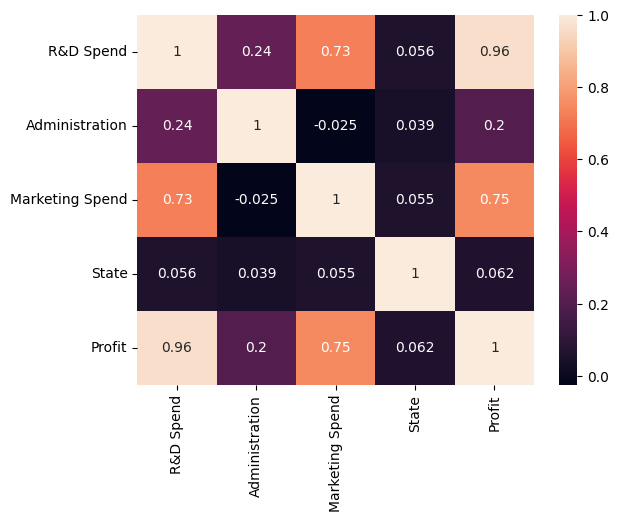

In [43]:
import seaborn as sns
sns.heatmap(ds.corr(),annot=True)

In [44]:
ds.corr().Profit.sort_values(ascending = False)

Profit             1.000000
R&D Spend          0.964770
Marketing Spend    0.748957
Administration     0.198849
State              0.061662
Name: Profit, dtype: float64

In [45]:
# x and y split

x=ds.drop(columns=['Profit'],axis=1)
x.head()

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,2
1,162597.70,151377.59,443898.53,0
2,153441.51,101145.55,407934.54,1
3,144372.41,118671.85,383199.62,2
4,142107.34,91391.77,366168.42,1


In [46]:
y=ds.Profit
y.head()

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: Profit, dtype: float64

In [47]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [48]:
x_scaled=pd.DataFrame(sc.fit_transform(x),columns=x.columns)
x_scaled.head()

,R&D Spend,Administration,Marketing Spend,State
0,2.018191,0.556966,2.187835,1.167315
1,1.956756,1.089397,1.950290,-1.234019
2,1.752320,-0.757668,1.643929,-0.033352
3,1.549829,-0.113215,1.433223,1.167315
4,1.499255,-1.116321,1.288141,-0.033352


In [49]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.3,random_state=0)

In [50]:
x_train.shape

(75, 4)

In [51]:
y_train.shape

(75,)

In [52]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [53]:
lr.fit(x_train,y_train)

LinearRegression()

In [54]:
y_pred = lr.predict(x_test)
y_pred

array([ 49834.19042876, 135169.07317544,  77000.93217894, 181432.54310274,
       114162.25669043, 134479.53421762, 129427.76546192, 159400.46548644,
       116583.63678447,  46769.43557765, 102656.45571687, 115715.43246027,
        49834.19042876, 119084.4740891 ,  89968.66652102, 126628.33072643,
       126628.33072643,  91187.29841311,  59387.68700648, 146665.30533041,
       148779.77747951, 152290.16694321, 110399.50075741, 171505.20432539,
        98920.99509539, 174028.41996606, 116759.58274761,  51444.81172219,
        99408.69250706, 155079.61654293,  84061.06538764, 192780.06148352,
       187385.77534396])

In [55]:
y_test


84      64926.08
10     146121.95
75      90708.19
2      191050.39
24     108552.04
100    144259.40
107    124266.90
7      155752.60
16     126992.93
86      42559.73
68     101004.64
22     110352.25
45      64926.08
60     111313.02
76      89949.14
52     134307.35
13     134307.35
73      96712.80
85      49490.75
54     129917.04
103    132602.65
8      152211.77
26     105733.54
93     166187.94
33      96778.92
3      182901.99
66     105008.31
48      35673.41
30      99937.59
6      156122.51
78      81005.76
89     192261.83
90     191792.06
Name: Profit, dtype: float64

In [56]:
salary =  pd.DataFrame({'Actual_salary':y_test,'Predicted_salary':y_pred})

In [57]:
salary

,Actual_salary,Predicted_salary
84,64926.08,49834.190429
10,146121.95,135169.073175
75,90708.19,77000.932179
2,191050.39,181432.543103
24,108552.04,114162.256690
100,144259.40,134479.534218
107,124266.90,129427.765462
7,155752.60,159400.465486
16,126992.93,116583.636784
86,42559.73,46769.435578


In [58]:
ds.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


In [61]:
lr.predict([[165349.20,151377.59,407934.54,0]])/100000

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([72496.01132375])

##Evaluation Metrics For Regression

In [62]:
from sklearn import metrics

In [64]:
# R-Square
# on test data
metrics.r2_score(y_test,y_pred)

0.9547979712370787

In [66]:
y_pred1=lr.predict(x_train)
y_pred1

array([164184.54360042, 129165.97286733, 116603.29900608, 116759.58274761,
       129427.76546192, 115715.43246027, 129165.97286733, 114162.25669043,
        97638.88425676,  62125.21721818, 187385.77534396,  75392.6669598 ,
        71215.21125668,  76345.59209665, 171505.20432539, 146665.30533041,
       131349.49247407,  75392.6669598 ,  72595.0748411 , 164184.54360042,
       148779.77747951, 135169.07317544, 131349.49247407, 192780.06148352,
        89278.32570735, 101591.29402179, 116583.63678447, 134479.53421762,
       134479.53421762, 111235.40818953,  92725.58997825, 111235.40818953,
        98560.19774088, 152290.16694321, 129427.76546192,  65785.29657649,
       174028.41996606,  97638.88425676, 181432.54310274, 148779.77747951,
        72747.63550696, 115129.83988265, 102656.45571687,  48821.3505962 ,
       116583.63678447, 131349.49247407, 100363.17885995,  77300.07844953,
       116603.29900608, 126628.33072643,  98920.99509539,  72595.0748411 ,
       101443.77942648,  

In [68]:
# on training data
metrics.r2_score(y_train,y_pred1)

0.924599312950711

In [69]:
# training data must br higher than testing data accurucy - overfitting

In [ ]:
train - .95
test  - .70

In [ ]:
# # training data must br less than testing data accurucy - underfitting

In [ ]:
train - .7
test  - .9

In [ ]:
#this is what trade off

In [70]:
#  MSE _ mean Square Error

metrics.mean_squared_error(y_test,y_pred)

78185655.59165949

In [73]:
# RMSE
np.sqrt(metrics.mean_squared_error(y_test,y_pred))

8842.265297516213